# Теория вероятностей и математическая статистика

## Урок 2

## Дискретные случайные величины. Закон распределения вероятностей.  Биномиальный закон распределения. Распределение Пуассона

### Разбор домашнего задания

__Задачи 1 и 2__

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина `X` задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины `X`.

_Подсказка_: постройте закон распределения случайной величины `X`.

__Решение__

Угадывать ответы на каждый вопрос мы собираемся независимо, поэтому воспользуемся биномиальным распределением. В нашем случае $n = 5$ и $p = \dfrac{1}{4}$. Итак,
$$P(X = k) = C_5^k \cdot 0.25^k \cdot 0.75^{5 - k},$$

где $k$ — число от 0 до 5 включительно.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [ ]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [ ]:
n = 5
p = 0.25

In [ ]:
def proba(k: int) -> float:
    return combinations(n, k) * (p ** k) * ((1 - p) ** (n - k))

In [ ]:
x_values = np.arange(0, n + 1)

print(x_values)

[0 1 2 3 4 5]


In [ ]:
x_probas = np.array([proba(value) for value in x_values])

print(x_probas)

[0.23730469 0.39550781 0.26367188 0.08789062 0.01464844 0.00097656]


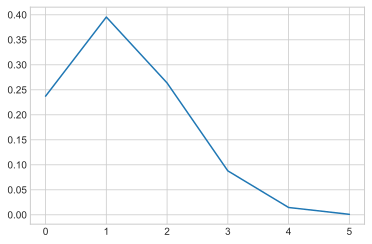

In [ ]:
plt.plot(x_values, x_probas)

In [ ]:
x_probas.sum()

1.0

Посчитаем математическое ожидание и дисперсию напрямую:

In [ ]:
m = (x_values * x_probas).sum()

print(m)

1.25


In [ ]:
y_values = (x_values - m) ** 2

d = (y_values * x_probas).sum()

print(d)

0.9375


Мы знаем, что математическое ожидание биномиального распределения с параметрами $n$, $p$ равно $np$, а дисперсия — $n p (1 - p)$. Сравним эти значения с получившимися у нас выше.

In [ ]:
n * p

1.25

In [ ]:
n * p * (1 - p)

0.9375

__Задача 3__

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число `N`, такое, что с вероятностью 0.95 пользователь получит не более `N` писем со спамом за текущий день.

__Решение__

Имеем распределение Пуассона с параметром $\lambda = 10$. Чтобы получить искомое число, будем суммировать вероятности значений, начиная с $0$, пока не достигнем отметки в $0.95$.

In [ ]:
def proba(k: int) -> float:
    return (10 ** k) * np.exp(-10) / np.math.factorial(k)

In [ ]:
i = -1
p = 0

while p < 0.95:
    i += 1
    p += proba(i)

i, p

(15, 0.9512595966960214)

Кстати, такого рода «процедуры» (нахождения порогового значения по заданной вероятности) являются т.н. квантильными функциями. О них мы поговорим немного позже. Но проверить ответ можно следующим образом?

In [ ]:
from scipy import stats

In [ ]:
stats.poisson.ppf(0.95, 10)

15.0

__Задача 4__

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

_Подсказка_: 1) "Вероятность попасть `k` раз при `n` выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность `P(X >= k)`, а не `P(X = k)`? 3) Здесь предстоит немножко покодить.

__Решение__

Вся задача упирается в то, чтобы научиться считать вероятность $P(X \geq k)$ для величины $X$, имеющей биномиальное распределение. Мы знаем, что
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

In [ ]:
def binom_proba(n: int, k: int, p: float) -> float:
    """Формула Бернулли.
    """
    
    return combinations(n, k) * (p ** k) * ((1 - p) ** (n - k))

Чтобы получить вероятность $P(X \geq k)$, нужно лишь просуммировать отдельные вероятности:
$$P(X \geq k) = \displaystyle\sum_{i = k}^n C_n^i p^i (1 - p)^{n - i}$$

Альтернативный, более вычислительно оптимальный способ — считать вероятность:
$$P(X \geq k) = 1 - P(X < k) = 1 - \displaystyle\sum_{i = 0}^{k - 1} C_n^i p^i (1 - p)^{n - i}$$

In [ ]:
def binom_proba_geq(n: int, k: int, p: float) -> float:
    """Вероятность `P(X >= k)` для биномиального распределения.
    """
    
    return 1 - sum(binom_proba(n, i, p) for i in range(k))

Итак, вернёмся к нашей задаче. Вероятность попадания при однократном выстреле равна $0.01$. Нам нужно найти число выстрелов $n$, при котором мы можем быть уверены с вероятностью $0.9$ в по меньшей мере $6$ попаданиях. Беда в том, что полученную выше формулу аналитически обратить невозможно (т.е. нельзя предъявить какую-то функцию, которая по значению вероятности $0.9$ возвращает значение $n$). Поэтому мы это значение будем искать вычислительно.

Итак, будем считать значение $P(X \geq 6)$ по формуле выше, увеличивая число $n$.

In [ ]:
p = 0.01
P = 0
k = 6
n = 9

while P < 0.9:
    n += 1
    P = binom_proba_geq(n, k, p)
    
    if n % 200 == 0:
        print(f'{n}\t{P}')
        
print(f'\nОтвет:\n{n}\t{P}')

200	0.01602290690917929
400	0.21408092149896019
600	0.5551279698323172
800	0.810143551899295

Ответ:
926	0.9003627121531355


Частым вариантом неверного решения является следующий код:

In [ ]:
p = 0.01
P = 0
k = 6
n = 5

while P < 0.9:
    n += 1
    P += binom_proba(n, k, p)
    
    if n % 200 == 0:
        print(f'{n}\t{P}')
        
print(f'\nОтвет:\n{n}\t{P}')

200	0.44128159746548246

Ответ:
230	0.9185129699543314


Ошибка здесь заключается в том, что вероятность попасть хотя бы 6 раз с, например, 100-го раза не суммируется из вероятностей попасть ровно 6 раз при меньших количествах выстрелов. Кстати, продолжая этот цикл в том же ключе, можно вообще получить «вероятности» больше единицы, что явно свидетельствует о том, что что-то не так.

In [ ]:
p = 0.01
P = 0
k = 6
n = 5

while P < 10:
    n += 1
    P += binom_proba(n, k, p)
    
    if n % 200 == 0:
        print(f'{n}\t{P}')
        
print(f'\nОтвет:\n{n}\t{P}')

200	0.44128159746548246

Ответ:
390	10.046288575894186
